In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
# import mnist dataset
from dataset.dataset import Dataset
# custom library
from utility.utility import Utility
from network.loss_functions import Loss
from network.early_stopping import EarlyStopping
from network.neural_network import NeuralNetwork
from network.activation_functions import ActivationFunctions

In [2]:
# get dataset
X_train, Y_train, X_test, Y_test = Dataset.load_mnist()
X_train, Y_train, X_val, Y_val = Dataset.train_val_split(X_train, Y_train, percentage=0.2, random_state=None)

In [3]:
# print dataset 
Utility.print_info_dataset(X_train.shape, Y_train.shape, X_val.shape, Y_val.shape, X_test.shape, Y_test.shape)

+-----------+-----------+-----------+
| Dataset   |   X shape |   Y shape |
+===========+===========+===========+
| X_train   |       784 |     48000 |
+-----------+-----------+-----------+
| Y_train   |        10 |     48000 |
+-----------+-----------+-----------+
| X_val     |       784 |     12000 |
+-----------+-----------+-----------+
| Y_val     |        10 |     12000 |
+-----------+-----------+-----------+
| X_test    |       784 |     10000 |
+-----------+-----------+-----------+
| Y_test    |        10 |     10000 |
+-----------+-----------+-----------+ 



In [9]:
# initialize the network
nn = NeuralNetwork(input_size=X_train.shape[0],
                   output_size=Y_train.shape[0],
                   n_hidden_layers=1,
                   m_neurons_list=[50],
                   activation_list=[ActivationFunctions.sigmoid, ActivationFunctions.identity],
                   error_function=Loss.cross_entropy_softmax)

In [10]:
# print network info
nn.summary()

Network summary

 +-----------------+--------------+---------------+--------------------+-----------------+---------------+-----------------------+
|      Layer      |   Input size |   Output size |    #N. of neurons  | Weights shape   | Activation    | Error                 |
|                 |              |               |    of hidden layer |                 | functions     | functions             |
+=================+==============+===============+====================+=================+===============+=======================+
|      Input      |          784 |               |                    |                 |               |                       |
+-----------------+--------------+---------------+--------------------+-----------------+---------------+-----------------------+
| Hidden Layer #1 |              |               |                 50 | (50, 784)       | sigmoid       |                       |
+-----------------+--------------+---------------+--------------------+-

In [11]:
# copy the network to compare with an untrained one
not_trained = nn.copy_network()

In [12]:
# training
res = nn.train(x_train=X_train, 
                y_train=Y_train, 
                x_val=X_val, 
                y_val=Y_val,
                learning_rate=0.0001,
                momentum=0.9,
                epochs=500,
                early_stopper=EarlyStopping(),
                mode='batch')

Learning mode is batch
[==============================]

Epoch 1/500
[==============================] - 0.41s/step - loss: 200596.9646 - accuracy: 0.1478 - val_loss: 50964.0434 - val_accuracy: 0.1435 -  p: 15
Epoch 2/500
[==============================] - 0.36s/step - loss: 130812.9964 - accuracy: 0.1138 - val_loss: 32688.7209 - val_accuracy: 0.1068 -  p: 15
Epoch 3/500
[==============================] - 0.62s/step - loss: 108186.8102 - accuracy: 0.2890 - val_loss: 27067.3359 - val_accuracy: 0.2853 -  p: 15
Epoch 4/500
[==============================] - 0.65s/step - loss: 103615.9263 - accuracy: 0.3257 - val_loss: 25970.0538 - val_accuracy: 0.3182 -  p: 15
Epoch 5/500
[==============================] - 0.65s/step - loss: 97574.6286 - accuracy: 0.3053 - val_loss: 24496.9641 - val_accuracy: 0.3022 -  p: 15
Epoch 6/500
[==============================] - 0.33s/step - loss: 91155.6094 - accuracy: 0.3744 - val_loss: 22897.6263 - val_accuracy: 0.3692 -  p: 15
Epoch 7/500
[====================

In [13]:
# get epoch where the validation error was minumum
epoch = res['epoch_best']
print(
    f" Validation accuracy: {res['Accuracy_val'][epoch]}\n",
    f"Training accuracy: {res['Accuracy_train'][epoch]}\n",
    f"Validation loss: {res['Loss_val'][epoch]}\n",
    f"Training loss: {res['Loss_train'][epoch]}\n",
    f"Time: {res['Time']}\n",
    f"Best epoch: {res['epoch_best']}\n",
    f"Stop: {res['stop']}"
)

 Validation accuracy: 0.9143333333333333
 Training accuracy: 0.9195625
 Validation loss: 3479.5218438510183
 Training loss: 13371.988092329011
 Time: 68.88
 Best epoch: 98
 Stop: 113


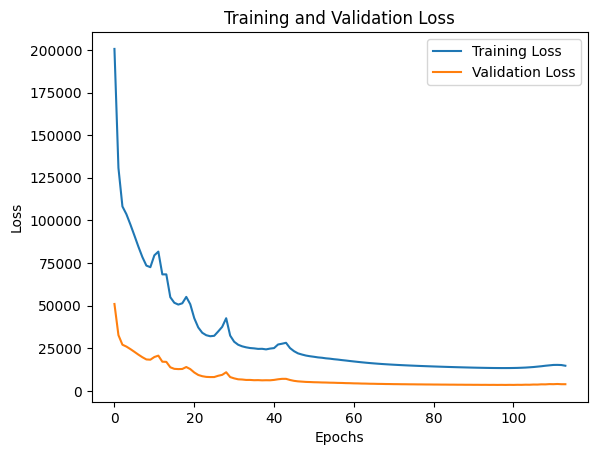

In [14]:
# plot Loss
plt.figure()
plt.plot(res['Loss_train'], label="Training Loss")
plt.plot(res['Loss_val'], label="Validation Loss")
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

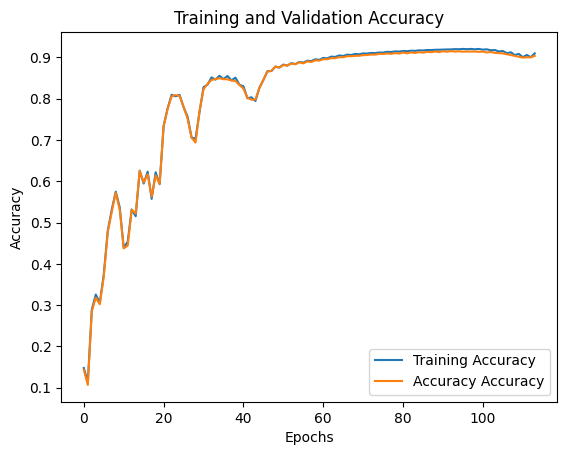

In [15]:
# plot Accuracy
plt.figure()
plt.plot(res['Accuracy_train'], label="Training Accuracy")
plt.plot(res['Accuracy_val'], label="Accuracy Accuracy")
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.close() 

Accuracy 0.9095

Report:
              precision    recall  f1-score   support

     Digit 0       0.94      0.97      0.96       980
     Digit 1       0.97      0.97      0.97      1135
     Digit 2       0.91      0.92      0.91      1032
     Digit 3       0.95      0.86      0.90      1010
     Digit 4       0.81      0.97      0.88       982
     Digit 5       0.85      0.92      0.88       892
     Digit 6       0.89      0.95      0.92       958
     Digit 7       0.90      0.92      0.91      1028
     Digit 8       0.90      0.90      0.90       974
     Digit 9       0.98      0.72      0.83      1009

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



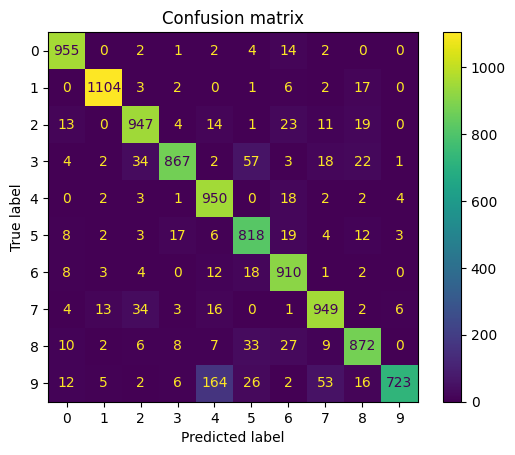

In [16]:
# evaluation of trained model
target_names = ['Digit 0', 'Digit 1', 'Digit 2', 'Digit 3', 'Digit 4', 'Digit 5', 
                'Digit 6', 'Digit 7', 'Digit 8', 'Digit 9',]
accuracy, confusion_matrix, report = nn.evaluate_model(X_test, Y_test, target_names)
# print results
print(f"Accuracy {accuracy}\n")
print(f"Report:\n{report}")
# plot confusion matrix
display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels=np.arange(10))
display.plot()
plt.title("Confusion matrix")
plt.show()

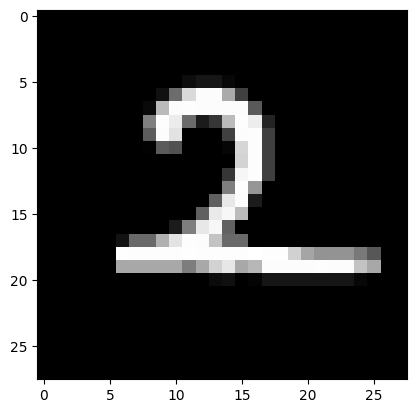


Element chosen has [[2]] and has shape (784, 1)



In [17]:
# get random element from test set
elem, label = Utility.get_random_elem(X_test, Y_test)
print(f"\nElement chosen has [{label}] and has shape {elem.shape}\n")

In [19]:
# print prediction
trained_prediction = nn.predict(elem)
not_trained_prediction = not_trained.predict(elem)
print("Prediction from trained network:\n", trained_prediction, "\nNetwork prediction: ", np.argmax(trained_prediction))
print("=" * 50)
print("Prediction from NOT trained network:\n", not_trained_prediction, "\nNetwork prediction: ", np.argmax(not_trained_prediction))
print("=" * 50, "\n")

Prediction from trained network:
 [[2.20149725e-05]
 [1.53651778e-03]
 [9.94144958e-01]
 [7.14214607e-04]
 [3.88552828e-05]
 [3.32669040e-04]
 [2.20110611e-03]
 [3.58883677e-04]
 [5.73860142e-04]
 [7.69206257e-05]] 
Network prediction:  2
Prediction from NOT trained network:
 [[0.07490217]
 [0.12597881]
 [0.0752545 ]
 [0.07511913]
 [0.04191717]
 [0.03858123]
 [0.12551377]
 [0.03879715]
 [0.31802652]
 [0.08590955]] 
Network prediction:  8

